### SIGN LANGUAGE RECOGNITION MODEL USING CONVOLUTIONAL NEURAL NETWORKS

#### INTRODUCTION & PROBLEM DEFINITION

With the rapid advancement in technology & artificial intelligence, humanity has made significant efforts to create meaningful innovation towards making life a lot easier for the physically disabled. Communication is a vital component of the human experience that allows individuals to become educated, share their ideas & bring people together through shared understanding.

The aim is to train a deep learning (Convolutional Neural Network) model to learn the American Sign Language Alphabetic symbols through static hand gesture detection, allowing for commmunication through finger-spelling to form complete words by combining an array of gestures. The model helps people looking to learn basic sign language improving their knowledge base and allowing them to communicate with other hearing or speech impaired individuals. This model is a relatively low-cost soluton that intends to educate and therefore motivate more special needs students(especially dead & mute) to strive for higher education and better employment or entrepreneurial opportunities for themselves.


#### WHY CNN?

1. Retains the 2D spatial nature of the images
2. CNN is a very appropriate for fitting networks for image processing & classificaton
3. Efficient in reducing the number of parameters without losing on the quality of the model during static image classification.

#### MODEL LIMITATIONS

Since this model accepts images as input while there are symbols(letters) that rely on hand motion in the American Sign Language system

This means that this dataset is without accurate depiction of 2 letters that require hand motion; J & Z. However the dataset's source was kind enough to convert those two symbols into static images by capturing the last frame in their hand motion sequence.


#### DATASET INFO

The dataset used in this model creations was acquired from author, Ayush Thakur, through the trusted dataset source, Kaggle. It is useful for this project which entails the multiclass classification of hand gesture images.

The datasets consists of two folders, asl_alphabet_train & asl_alphabet_test each with 29 other subfolders .

Every one of the 29 labelled subfolders contains 70 different iterations of their respective hand gestures meaning there is no missing data in this dataset.

DATASET SOURCE: https://www.kaggle.com/ayuraj/asl-dataset

In [74]:
# Import neccessary packages
import numpy as np
np.random.seed(5)
import tensorflow as tf
import keras
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
%pylab 
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### Data Collection & Exploratory Data Analysis

In [2]:
# Importing data
# Train set
train_set_dir = 'asl_alphabet_train'
# Evaluation Test Set
test_set_dir = 'asl_alphabet_test'

In [3]:
# Understanding the Dataset
# Show dataset contents
test_set_dir = 'asl_alphabet_test'
train_set_dir = 'asl_alphabet_train'
alphabets_asl = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
                 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
                 'W', 'X', 'Y', 'Z', 'del', 'space', 'nothing']


#### Visualising the Training Data

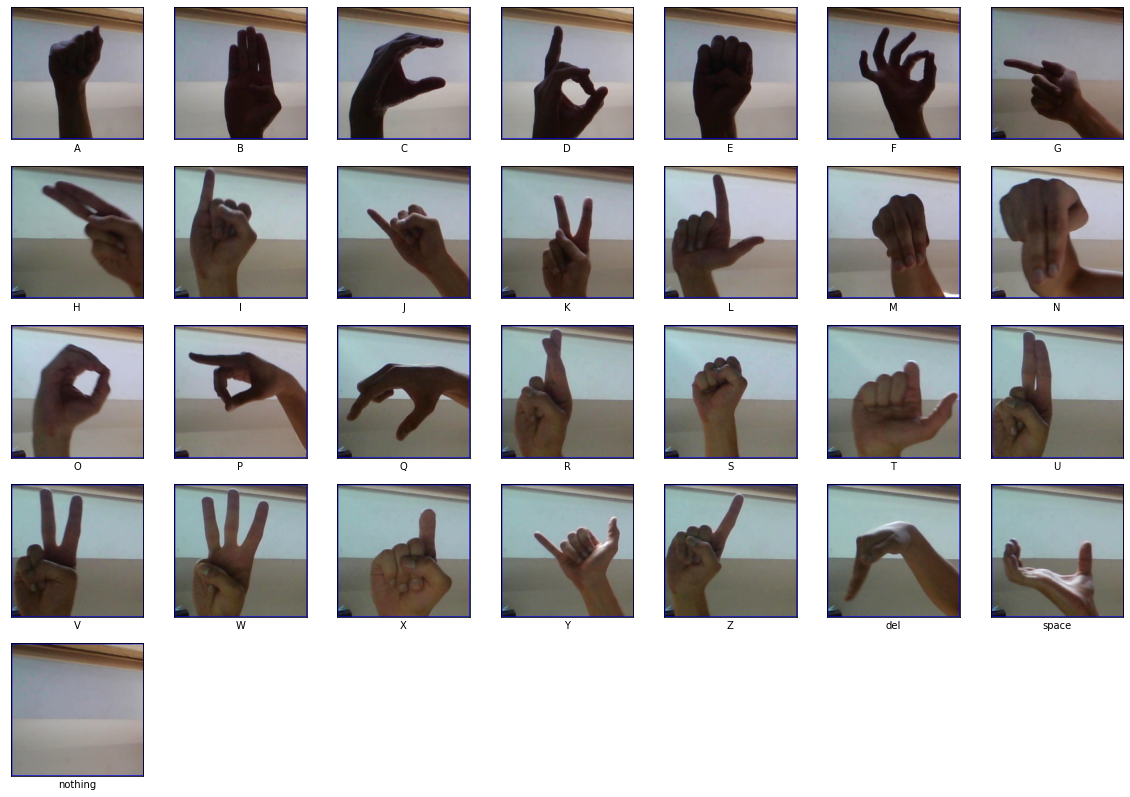

In [4]:
# Viewing data images
plt.figure(figsize=(20, 20))

# Looping through the first image in every letter/symbol's folder
for index in range (0,29):
    plt.subplot(7,7,index+1)
    plt.xticks([])
    plt.yticks([])
    path = train_set_dir + "/{0}/{0}1.jpg".format(alphabets_asl[index])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(alphabets_asl[index])

### Data Preprocessing

This section involves pre-processing the images in the dataset to prepare them for training.


Some of the pre-processing perfomred include
1. Decoding the images in the folders
2. Removing colour from the images making them grayscale. Colour would call for more computational resources, therefore, taking more time & consuming a lot of computational power.
3. Resizing the images to an appropriate size
4. Collecting the the labels used as identifiers for symbols as well as their corresponding image sets

In [5]:
# Loading the datasets
# Function to help acquire images from labelled directories
def get_images(folder, unique_id):
    identifiers = []
    images = []
    for idx, identifier in enumerate(unique_id):
        if(folder == train_set_dir):
            for file in os.listdir(folder + "/" + identifier):
                filepath = folder + "/" + identifier + "/" + file
                image = cv2.imdecode(np.fromfile(filepath, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                image = cv2.resize(image, (64, 64))
                images.append(image)
                identifiers.append(idx)
        else:
            filepath = folder + "/" + identifier 
            #image = cv2.resize(cv2.imread(filepath), (64, 64))
            image = cv2.imdecode(np.fromfile(filepath, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (64, 64))
            images.append(image)
            identifiers.append(idx)
    images = np.array(images)
    labels = np.array(identifiers)
    return(images, identifiers)

In [6]:
# Loading asl symbol images using the above function
asl_train = sorted(os.listdir(train_set_dir))
asl_test = sorted(os.listdir(test_set_dir))

# Loading Images in Training Folder
images, identifiers = get_images(train_set_dir, asl_train)

# Loading Images for Evaluating the Model
x_evaluation, y_evaluation = get_images(test_set_dir, asl_test)

In [7]:
# Splitting the data into Train & Test Sets for the Training Phase
x_train, x_test, y_train, y_test = train_test_split(images, identifiers, test_size=0.1, stratify=identifiers)

data_len = len(asl_train)
train_len = len(x_train)
test_len = len(x_test)
evaluation_len = len(x_evaluation)

print("Total No of Alphabetic Symbol Folders = ", data_len)
print("No of Training Images in Folders = ", train_len)
print("No of Testing Images in Folders = ", test_len)
print("No of Evaluation Images in Folders = ", evaluation_len)

Total No of Alphabetic Symbol Folders =  29
No of Training Images in Folders =  78300
No of Testing Images in Folders =  8700
No of Evaluation Images in Folders =  28


In [8]:
# View the shape of training data
x_train.shape

(78300, 64, 64)

In [9]:
x_test.shape

(8700, 64, 64)

In [10]:
x_evaluation.shape

(28, 64, 64)

### Data Transformation & Encoding

In [11]:
#  Encoding Labels
y_test = keras.utils.np_utils.to_categorical(y_test)
y_train = keras.utils.np_utils.to_categorical(y_train)
y_evaluation = keras.utils.np_utils.to_categorical(y_evaluation)

In [12]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
x_evaluation = x_evaluation.astype('float32')/255.0

# Reshaping the Training Data
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

### Preparing the Model for training

In [11]:
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.layers import Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential

# Building the Convolutional Neural Network Model(CNN) (Base Model)
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu', input_shape = (64, 64, 1)))
cnn_model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (4, 4)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
cnn_model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (4, 4)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(29, activation='softmax'))

In [12]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       409728    
                                                        

### Training The Model

In [18]:
# Compiling the CNN Model
cnn_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
# Fitting & Training the Model
asl_pred_model = cnn_model.fit(x_train, y_train, epochs = 5, batch_size=64, verbose=1, validation_data = (x_test, y_test))

Epoch 1/5
1224/1224 [==============================] - 3571s 3s/step - loss: 1.3740 - accuracy: 0.5874 - val_loss: 0.2219 - val_accuracy: 0.9214
Epoch 2/5
1224/1224 [==============================] - 4230s 3s/step - loss: 0.2119 - accuracy: 0.9315 - val_loss: 0.0361 - val_accuracy: 0.9876
Epoch 3/5
1224/1224 [==============================] - 3858s 3s/step - loss: 0.1295 - accuracy: 0.9615 - val_loss: 0.0119 - val_accuracy: 0.9967
Epoch 4/5
1224/1224 [==============================] - 3561s 3s/step - loss: 0.1093 - accuracy: 0.9690 - val_loss: 0.0095 - val_accuracy: 0.9975
Epoch 5/5
1224/1224 [==============================] - 4081s 3s/step - loss: 0.1028 - accuracy: 0.9733 - val_loss: 0.0141 - val_accuracy: 0.9962


Text(0.5, 1.0, 'Loss Evolution')

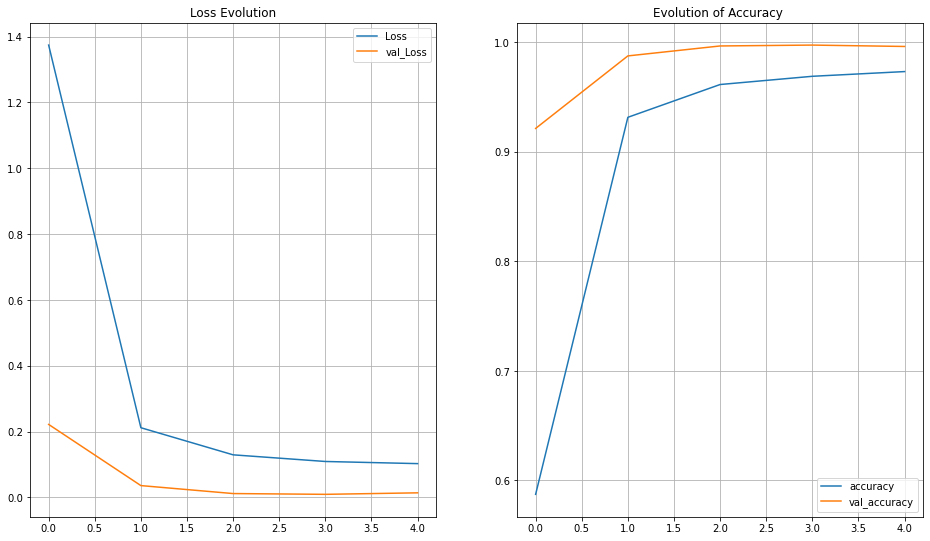

In [22]:
# Visualising the Model's Training Performance
plt.figure(figsize=(16, 20))

plt.subplot(2, 2, 2)
plt.plot(asl_pred_model.history['accuracy'], label='accuracy')
plt.plot(asl_pred_model.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Evolution of Accuracy ')

plt.subplot(2, 2, 1)
plt.plot(asl_pred_model.history['loss'], label='Loss')
plt.plot(asl_pred_model.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss Evolution')

In [48]:
# Saving the model
cnn_model.save('ASL_Summative.model')

INFO:tensorflow:Assets written to: ASL_Summative.model/assets


In [13]:
# loading the model
cnn_model=tf.keras.models.load_model('ASL_Summative.model')

### Evaluating the Model

In [35]:
# Evaluating the model's accuracy on the test set
test_set_accuracy = cnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print('CNN Model Accuracy on Test Set ---> ', str(test_set_accuracy[1]*100), '%')
print('CNN Model Loss on Test Set ---> ', str(test_set_accuracy[0]*100), '%')

CNN Model Accuracy on Test Set --->  99.62068796157837 %
CNN Model Loss on Test Set --->  1.4117542654275894 %


In [24]:
#Function to assist in plotting the confusion matrix
def plot_confusion_matrix(y, y_prediction):
    y = np.argmax(y, axis = 1)
    y_prediction = np.argmax(y_prediction, axis = 1)
    cm = confusion_matrix(y, y_prediction)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(asl_train))
    plt.xticks(tick_marks, asl_train, rotation=45)
    plt.yticks(tick_marks, asl_train)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

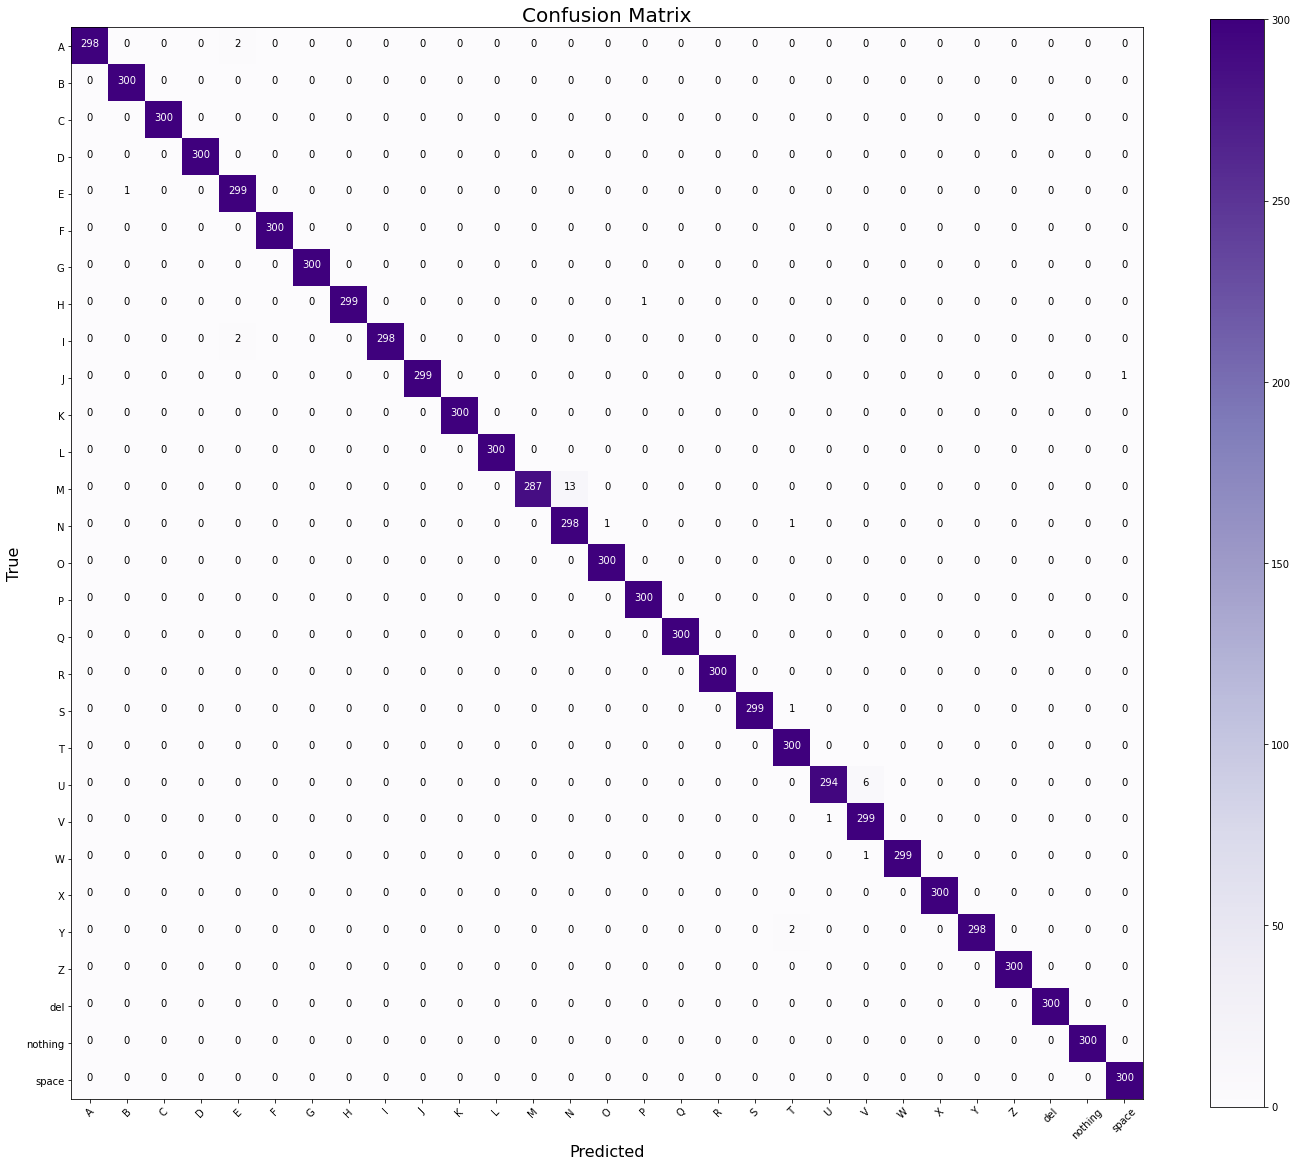

In [25]:
from sklearn.metrics import confusion_matrix
import itertools

# Test Set's Confusion Matrix
y_test_prediction = cnn_model.predict(x_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_prediction)

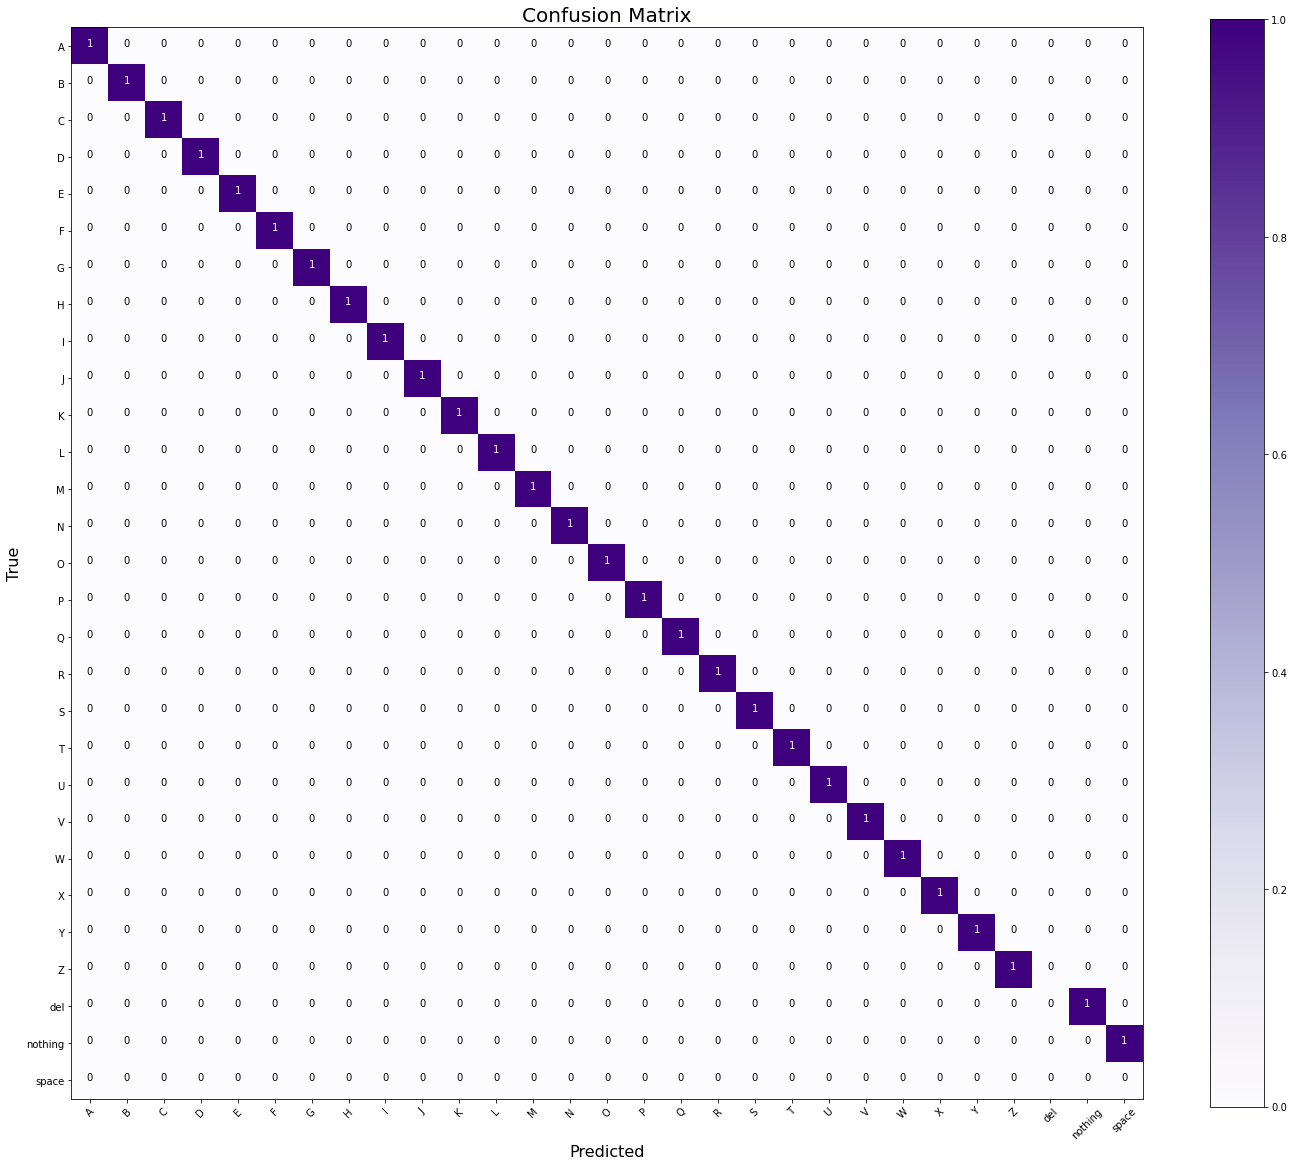

In [26]:
# Confusion Matrix for the Model's Evaluation dataset
y_eval_prediction = cnn_model.predict(x_evaluation, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_evaluation, y_eval_prediction)

In [36]:
# Getting the number of classes being predicted by the model
y_eval_prediction = cnn_model.predict(x_evaluation)
y_classes = np.argmax(y_eval_prediction, axis=1)

In [22]:
# Return number of unique classes predicted
np.unique(y_classes)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [38]:
# Function to prepare images for prediction
def prep_image(path):
    img = cv2.imdecode(np.fromfile(path, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64, 64))
    img=img.reshape(-1, 64, 64, 1)
    img=img.astype('float32')/255.0
    return  img

In [42]:
# Function to perform predictions
def predict_sign_lang(model, path):
    prediction = cnn_model.predict([prep_image(path)])
    label = np.argmax(prediction[0])
    return asl_train[label]

In [45]:
test_input_one = predict_sign_lang(cnn_model, 'test.png')
print("Prediction for the added image is: " + str(test_input_one))

Prediction for the added image is: B


In [46]:
test_input_one = predict_sign_lang(cnn_model, 'asl_alphabet_test/A_test.jpg')
print("Prediction for the added image is: " + str(test_input_one))

Prediction for the added image is: A


### Hyperparameter tuning

For this Sign Language Classification Project, I shall tune my parameters using KerasTuner.

To Install: !pip install keras-tuner

In [49]:
import keras_tuner as kt

In [70]:
# Creating the model using Keras Tuner
def model_tuner(hp):
    opt_model = keras.Sequential()
    opt_model.add(keras.layers.Conv2D(filters = hp.Int('conv_1_filter',min_value=32, max_value=64, step=16), kernel_size = hp.Choice('conv_1_kernel', values=[3,5]), padding = 'same', activation = 'relu', input_shape = (64, 64, 1)))
    opt_model.add(keras.layers.Conv2D(filters = hp.Int('conv_2_filter',min_value=32, max_value=64, step=16), kernel_size = hp.Choice('conv_2_kernel', values=[3,5]), padding = 'same', activation = 'relu'))
    opt_model.add(keras.layers.MaxPooling2D(pool_size = (4, 4)))
    opt_model.add(keras.layers.Dropout(0.5))
    opt_model.add(keras.layers.Conv2D(filters = hp.Int('conv_3_filter',min_value=64, max_value=128, step=16), kernel_size = hp.Choice('conv_3_kernel', values=[3,5]), padding = 'same', activation = 'relu'))
    opt_model.add(keras.layers.Conv2D(filters = hp.Int('conv_4_filter',min_value=64, max_value=128, step=16), kernel_size = hp.Choice('conv_4_kernel', values=[3,5]), padding = 'same', activation = 'relu'))
    opt_model.add(keras.layers.MaxPooling2D(pool_size = (4, 4)))
    opt_model.add(keras.layers.Dropout(0.5))
    opt_model.add(keras.layers.Conv2D(filters = hp.Int('conv_5_filter',min_value=128, max_value=256, step=16), kernel_size = hp.Choice('conv_5_kernel', values=[3,5]), padding = 'same', activation = 'relu'))
    opt_model.add(keras.layers.Dropout(0.5))
    opt_model.add(keras.layers.Flatten())
    opt_model.add(keras.layers.Dense(29, activation='softmax'))
    
    opt_model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2,1e-3])), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return opt_model

In [57]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [1]:
# Random Search function to help in finding optimal values for the model
find_optimal = RandomSearch(model_tuner, objective='val_accuracy', max_trials=5,  directory='output', project_name='aslrecognition')

NameError: name 'RandomSearch' is not defined

In [72]:
# Search for the best Parameter from the Model
find_optimal.search(x_train, y_train, epochs=3, validation_data = (x_test, y_test))

Trial 5 Complete [01h 40m 00s]
val_accuracy: 0.9744827747344971

Best val_accuracy So Far: 0.9956321716308594
Total elapsed time: 07h 47m 41s
INFO:tensorflow:Oracle triggered exit


In [94]:
# Obtaining optimised values for the asl model
best_model = find_optimal.get_best_models(num_models=2)[0]

In [95]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 48)        480       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 48)        57648     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 48)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 48)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 112)       134512    
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 80)        80720     
                                                        

In [96]:
best_model.fit(x_train, y_train, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
2447/2447 [==============================] - 1819s 742ms/step - loss: 0.1470 - accuracy: 0.9507 - val_loss: 0.0124 - val_accuracy: 0.9972
Epoch 2/5
2447/2447 [==============================] - 2159s 883ms/step - loss: 0.1305 - accuracy: 0.9579 - val_loss: 0.0122 - val_accuracy: 0.9968
Epoch 3/5
2447/2447 [==============================] - 2180s 891ms/step - loss: 0.1178 - accuracy: 0.9629 - val_loss: 0.0094 - val_accuracy: 0.9975
Epoch 4/5
2447/2447 [==============================] - 2176s 889ms/step - loss: 0.1097 - accuracy: 0.9657 - val_loss: 0.0094 - val_accuracy: 0.9976
Epoch 5/5
2447/2447 [==============================] - 2176s 889ms/step - loss: 0.1038 - accuracy: 0.9667 - val_loss: 0.0137 - val_accuracy: 0.9970


In [103]:
# Evaluating the model's accuracy on the test set
test_set_accuracy = best_model.evaluate(x=x_test, y=y_test, verbose=0)
print('Optimised Model Accuracy on Test Set ---> ', str(test_set_accuracy[1]*100), '%')
print('Optimised Loss on Test Set ---> ', str(test_set_accuracy[0]*100), '%')

Optimised Model Accuracy on Test Set --->  99.62068796157837 %
Optimised Loss on Test Set --->  1.4117542654275894 %


In [99]:
# Saving the Optimised Model
best_model.save('ASL_Optimized.model')

INFO:tensorflow:Assets written to: ASL_Optimized.model/assets


In [107]:
# loading the model
best_model=tf.keras.models.load_model('ASL_Optimized.model')

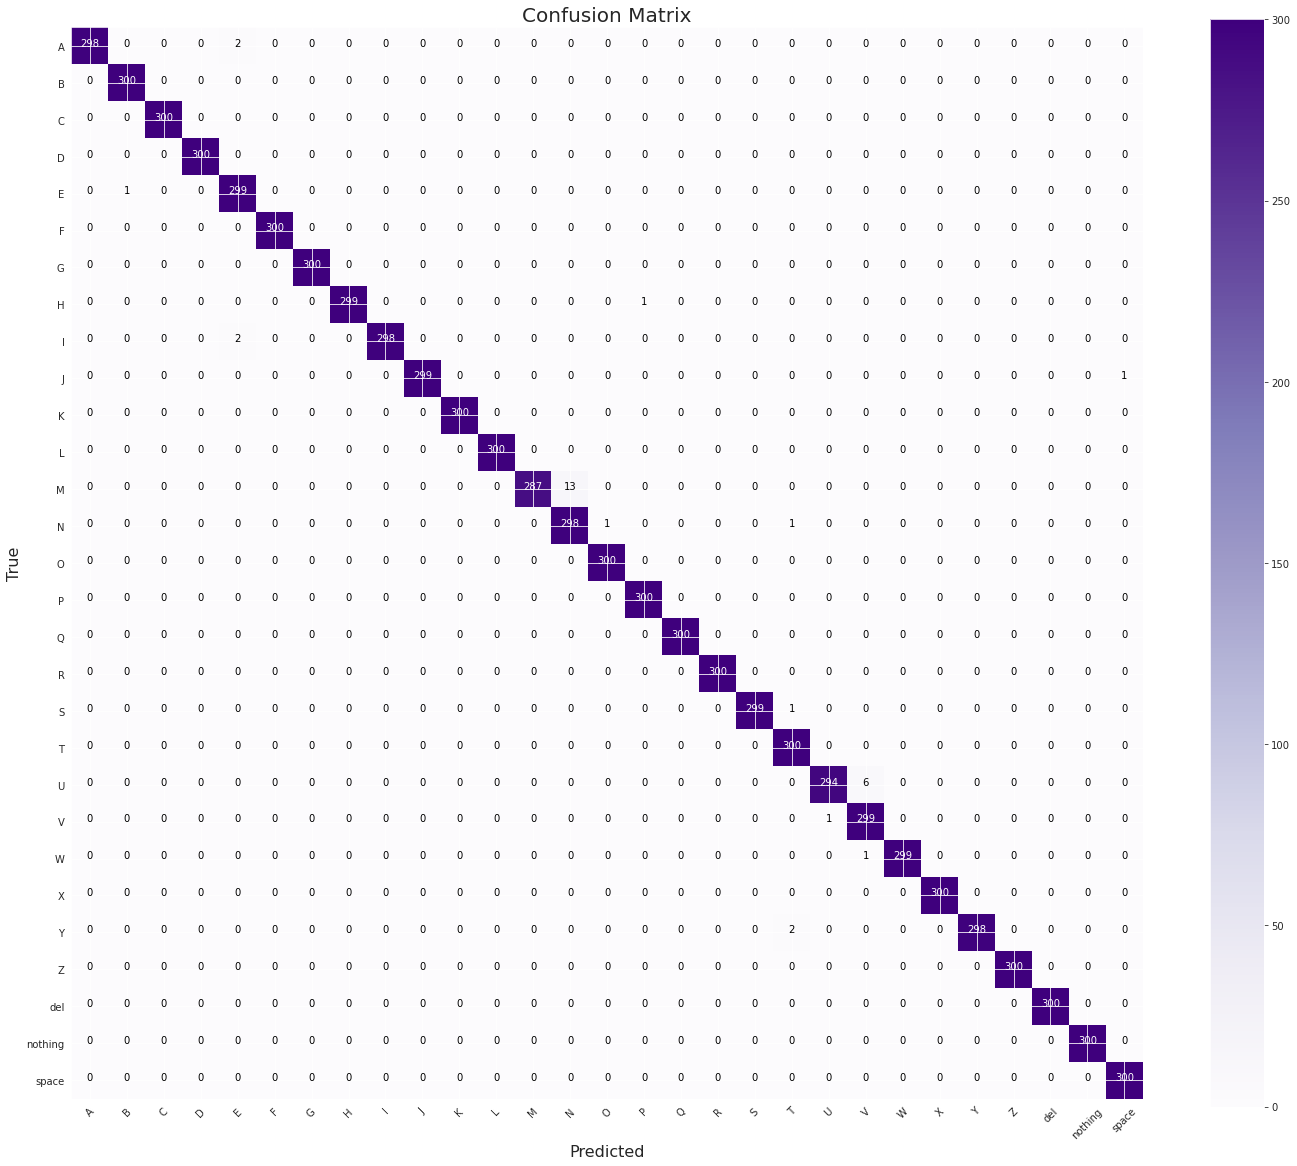

In [104]:
# Test Set's Confusion Matrix for Optimised Model
y_test_prediction = best_model.predict(x_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_prediction)

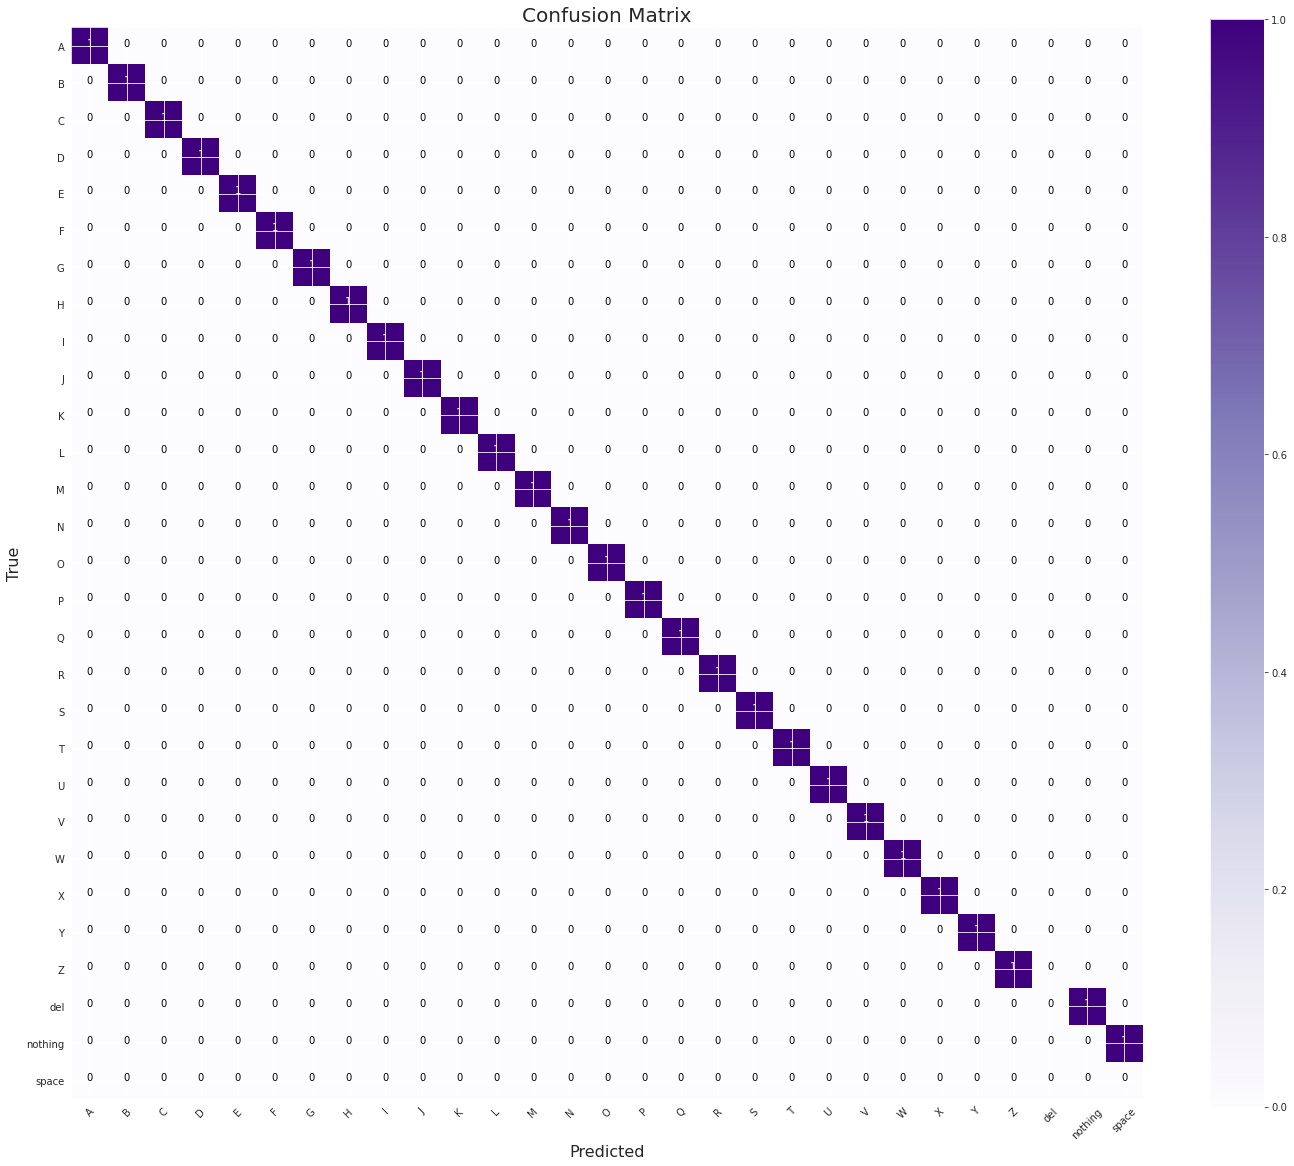

In [106]:
# Evaluation Set's Confusion Matrix for Optimised Model
y_test_evaluation = cnn_model.predict(x_evaluation, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_evaluation, y_test_evaluation)

In [109]:
test_input_one = predict_sign_lang(best_model, 'asl_alphabet_test/X_test.jpg')
print("Prediction for the added image is: " + str(test_input_one))

Prediction for the added image is: X


In [110]:
test_input_two = predict_sign_lang(best_model, 'asl_alphabet_test/K_test.jpg')
print("Prediction for the added image is: " + str(test_input_two))

Prediction for the added image is: K


In [111]:
test_input_three = predict_sign_lang(best_model, 'asl_alphabet_test/J_test.jpg')
print("Prediction for the added image is: " + str(test_input_three))

Prediction for the added image is: J


In [113]:
test_input_four = predict_sign_lang(best_model, 'asl_alphabet_test/K_test.jpg')
print("Prediction for the added image is: " + str(test_input_four))

Prediction for the added image is: K


In [112]:
test_input_five = predict_sign_lang(best_model, 'test.png')
print("Prediction for the added image is: " + str(test_input_five))

Prediction for the added image is: B
